In [ ]:
# I've explored the channels that are most prolific in terms of placing orders and creation of users

# Findings:
# The most users were created through channel 3 (38%) and these users placed the most orders (21%)
# Although channel 4 and 1 helped create a lot of users, they are less likely to submit orders compared to channel 3, 2 and 7
# From the users who order, more than 75% order 1,2 or 3 times but not more
# Most users are created at lunch (13 - 14) and in the evening. The values for morning are very low
# Through channel 1 a lot of users came that did not confirm their accounts, more than the ones who confirmed it

# Recommendations:
# Suggest investing more in channel 3,2,7
# Focus investment in your channels around lunch and evening
# Focus on existing active users who ordered already to make them order more through discounts
# Analyse more the nature of channel 1 and see why there are so many unconfirmed accounts there

# Further developments:
# Relation between orders and time/date
# Relation between notify_pref and orders
# Regression to see how the number of orders is increasing or decreasing relative to dates

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [3]:
user_data = pd.read_csv(
    "data/user.csv"
)

In [271]:
user_data.head()

,date_registration,time_registration,user_id,user_state_info,notify_pref,user_channel
0,1,0:00:35,12026036,Active,3,1
1,1,0:01:23,12026039,Active,3,2
2,1,0:02:35,12026042,Active,3,3
3,1,0:04:24,12026045,Unconfirmed,3,1
4,1,0:04:30,12026048,Unconfirmed,3,3


In [5]:
order_data = pd.read_csv(
    "data/order.csv"
)

In [270]:
order_data.head()

,date_ordered,time_ordered,order_id,user_id,type,product_category
0,1,1,7026578,12026081,Credit Package Purchase,1
1,1,1,7026584,12026081,Auction Win,1
2,1,1,7026635,12026132,Credit Package Purchase,1
3,1,1,7026662,12026237,Credit Package Purchase,1
4,1,1,7026677,12026237,Auction Win,1


In [268]:
all_data = pd.merge(user_data, order_data, on="user_id", how='outer')
all_data.head()

,date_registration,time_registration,user_id,user_state_info,notify_pref,user_channel,date_ordered,time_ordered,order_id,type,product_category
0,1,0:00:35,12026036,Active,3,1,NaN,NaN,NaN,NaN,NaN
1,1,0:01:23,12026039,Active,3,2,NaN,NaN,NaN,NaN,NaN
2,1,0:02:35,12026042,Active,3,3,NaN,NaN,NaN,NaN,NaN
3,1,0:04:24,12026045,Unconfirmed,3,1,NaN,NaN,NaN,NaN,NaN
4,1,0:04:30,12026048,Unconfirmed,3,3,NaN,NaN,NaN,NaN,NaN


In [43]:
mean_count_orders_per_user = order_data.groupby("user_id").agg(['count'])  
mean_count_orders_per_user.head(5)

,date_ordered,time_ordered,order_id,type,product_category
,count,count,count,count,count
user_id,,,,,
12026081,8,8,8,8,8
12026132,2,2,2,2,2
12026189,1,1,1,1,1
12026237,2,2,2,2,2
12026255,1,1,1,1,1


In [45]:
mean_count_orders_per_user["order_id"]["count"].describe()

# 1163 users have had orders
# mean = 2.7, median = 2 of the users who had orders

count    1163.000000
mean        2.766122
std         4.182825
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        62.000000
Name: count, dtype: float64

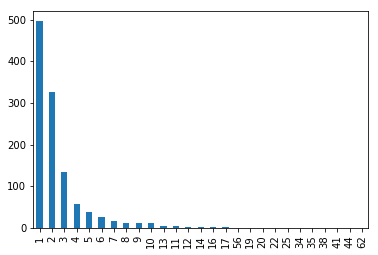

In [82]:
mean_count_orders_per_user["order_id"]["count"].value_counts().plot(kind='bar')

# from the users who order, more than 75% order 1,2 or 3 times but not more

In [67]:
mean_count_orders_per_user_all = all_data.groupby("user_id").agg(['count']) 
mean_count_orders_per_user_all["order_id"]["count"].describe()

# 6196 total unique users

count    6196.000000
mean        0.519206
std         2.109157
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        62.000000
Name: count, dtype: float64

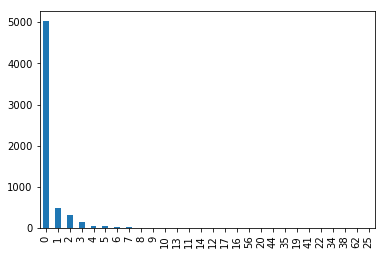

In [68]:
mean_count_orders_per_user_all["order_id"]["count"].value_counts().plot(kind='bar')

# a large percentage of users don't convert 

In [176]:
all_data_filtered = all_data[["order_id", "user_channel"]]
all_data_filtered.head()

,order_id,user_channel
0,NaN,1
1,NaN,2
2,NaN,3
3,NaN,1
4,NaN,3


In [162]:
number_orders = all_data_filtered.groupby(["user_channel"]).count().rename(columns={'order_id':'Total Orders'})
number_orders

,Total Orders
user_channel,
1,391
2,211
3,1805
4,425
5,102
6,124
7,159


In [163]:
number_users_channel = all_data_filtered.groupby(["user_channel"]).size().to_frame("Total Users")
number_users_channel

,Total Users
user_channel,
1,1521
2,422
3,3170
4,2044
5,400
6,403
7,290


In [164]:
channels_all = pd.merge(pd.DataFrame(number_users_channel),pd.DataFrame(number_orders),left_index=True,right_index=True)
channels_all

,Total Users,Total Orders
user_channel,,
1,1521,391
2,422,211
3,3170,1805
4,2044,425
5,400,102
6,403,124
7,290,159


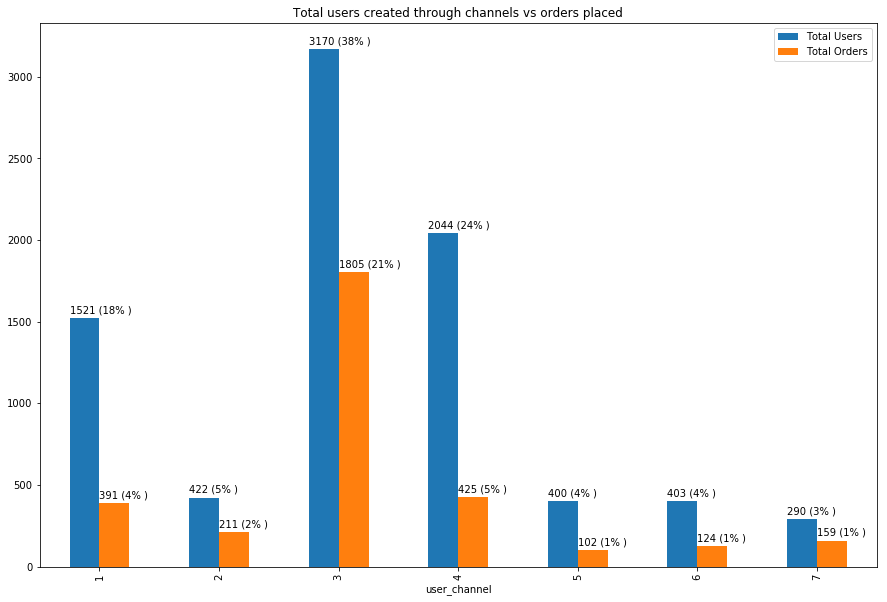

In [175]:
def percentage(part, whole):
  return int(100 * float(part)/float(whole))

ax = channels_all.plot(kind="bar", title="Total users created through channels vs orders placed", figsize=(15,10), legend=True)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())) +" ("+ str(percentage(p.get_height(), 8250)) + "% )", ((p.get_x()), int(p.get_height() + 30)))
    
# we can see that the most users were created through channel 3 (38%) and these users placed the most orders (21%). 
# although channel 4 and 1 helped create a lot of users, they are less likely to submit orders compared to channel 2 and 7
# suggest investing in channel 3,2,7

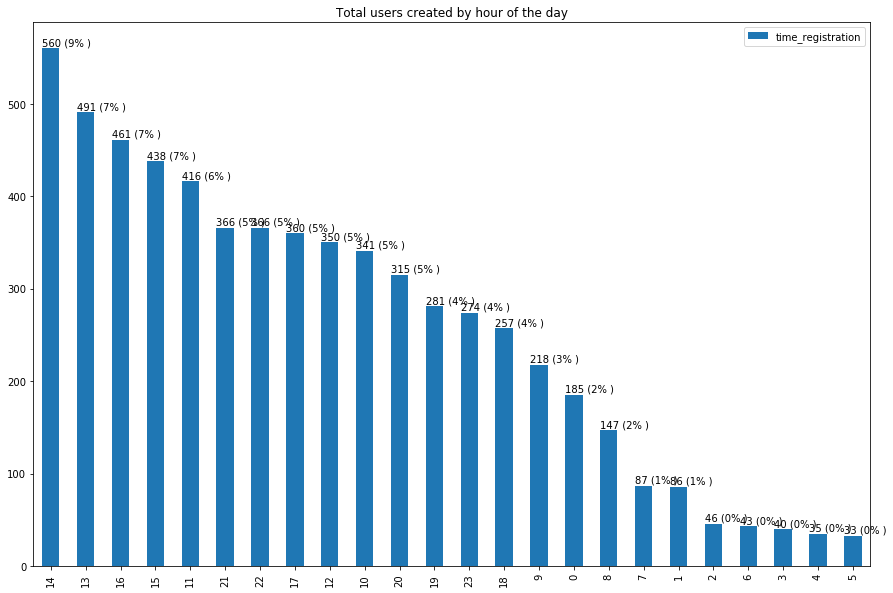

In [219]:
time_registration = user_data[["time_registration"]].apply(lambda x: x.str.split(":", 1).str[0]).apply(pd.to_numeric)["time_registration"].value_counts()
ax = time_registration.plot(kind="bar", title="Total users created by hour of the day", figsize=(15,10), legend=True)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())) +" ("+ str(percentage(p.get_height(), 6195)) + "% )", ((p.get_x()), int(p.get_height() + 3)))

# we can see that most users are created at lunch (13 - 14) and in the evening. The values for morning are low

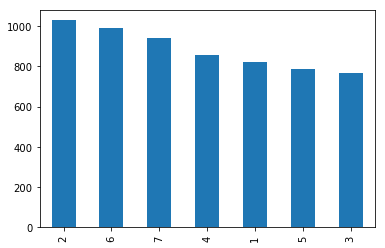

In [221]:
date_registration = user_data["date_registration"].value_counts()
date_registration.plot(kind="bar")

# on the contrary, the difference between registration dates are not that big

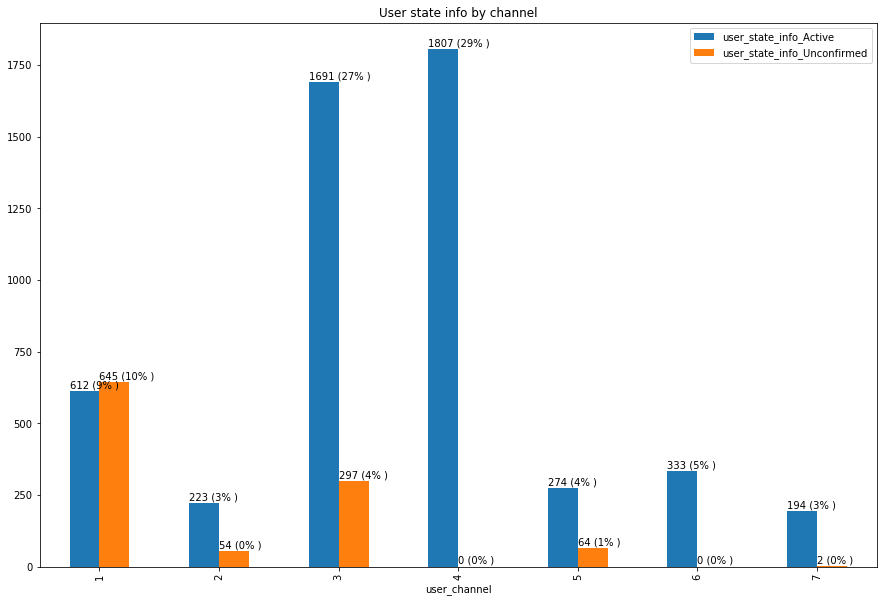

In [267]:
channel_status =  user_data[["user_channel","user_state_info"]]
channel_status = pd.get_dummies(channel_status)
ax = channel_status.groupby("user_channel").sum().plot(kind="bar", title="User state info by channel", figsize=(15,10), legend=True)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())) +" ("+ str(percentage(p.get_height(), 6195)) + "% )", ((p.get_x()), int(p.get_height() + 10)))

# we can see that the best channel regarding user state is the channel 4. There are no unconfirmed accounts through this channel
# channel 1 has a lot of unconfirmed accounts, more than the active ones. 